In [1]:
#import os
#os.environ["MODIN_ENGINE"] = "dask"

import numpy as np
np.random.seed(1337)

import pandas as pd
from matplotlib.pyplot import *
from datetime import datetime
import networkx as nx

matplotlib.pyplot.style.use('classic')

!python --version

Python 3.8.5


In [2]:
sp500 = pd.read_csv('^GSPC.csv', header = 0, index_col = 'Date')
sp500.index = pd.to_datetime(sp500.index, format = '%d-%m-%y')
sp500 = sp500[1:]
#sp500 = sp500.resample('W').mean()
#sp500.head()
print(len(sp500))

#import nifty50 data
nifty = pd.read_csv('^NSEI.csv', header = 0, index_col = 'Date')
nifty.index = pd.to_datetime(nifty.index, format = '%d-%m-%y')
nifty = nifty.reindex(index = sp500.index, method = 'bfill')
nifty.fillna(method = 'bfill', inplace=True)
#nifty = nifty.resample('W').mean()
#nifty.head()
print(len(nifty))

sing_sti = pd.read_csv('^sti_d.csv', header = 0, index_col = 'Date')
sing_sti.index = pd.to_datetime(sing_sti.index, format = '%Y-%m-%d')
sing_sti = sing_sti.reindex(index = sp500.index, method = 'bfill')
sing_sti.fillna(method = 'bfill', inplace=True)
print(len(sing_sti))

uk_100 = pd.read_csv('^ukx_d.csv', header = 0, index_col = 'Date')
uk_100.index = pd.to_datetime(uk_100.index, format = '%Y-%m-%d')
uk_100 = uk_100.reindex(index = sp500.index, method = 'bfill')
uk_100.fillna(method = 'bfill', inplace=True)
print(len(uk_100))

hangseng = pd.read_csv('^hsi_d.csv', header = 0, index_col = 'Date')
hangseng.index = pd.to_datetime(hangseng.index, format = '%Y-%m-%d')
hangseng = hangseng.reindex(index = sp500.index, method = 'bfill')
hangseng.fillna(method = 'bfill', inplace=True)
print(len(hangseng))

nikkei = pd.read_csv('^nkx_d.csv', header = 0, index_col = 'Date')
nikkei.index = pd.to_datetime(nikkei.index, format = '%Y-%m-%d')
nikkei = nikkei.reindex(index = sp500.index, method = 'bfill')
nikkei.fillna(method = 'bfill', inplace=True)
print(len(nikkei))

shanghai_comp = pd.read_csv('^shc_d.csv', header = 0, index_col = 'Date')
shanghai_comp.index = pd.to_datetime(shanghai_comp.index, format = '%Y-%m-%d')
shanghai_comp = shanghai_comp.reindex(index = sp500.index, method = 'bfill')
shanghai_comp.fillna(method = 'bfill', inplace=True)
print(len(shanghai_comp))

inr = pd.read_csv('DEXINUS.csv', header = 0, index_col = 'DATE')
inr.index = pd.to_datetime(inr.index, format = '%Y-%m-%d')
inr = inr.reindex(index = sp500.index, method = 'bfill')
inr.fillna(method = 'bfill', inplace=True)
print(len(inr))

cny = pd.read_csv('DEXCHUS.csv', header = 0, index_col = 'DATE')
cny.index = pd.to_datetime(cny.index, format = '%Y-%m-%d')
cny = cny.reindex(index = sp500.index, method = 'bfill')
cny.fillna(method = 'bfill', inplace=True)
print(len(cny))

jpy = pd.read_csv('DEXJPUS.csv', header = 0, index_col = 'DATE')
jpy.index = pd.to_datetime(jpy.index, format = '%Y-%m-%d')
jpy = jpy.reindex(index = sp500.index, method = 'bfill')
jpy.fillna(method = 'bfill', inplace=True)
print(len(jpy))

sgd = pd.read_csv('DEXSIUS.csv', header = 0, index_col = 'DATE')
sgd.index = pd.to_datetime(sgd.index, format = '%Y-%m-%d')
sgd = sgd.reindex(index = sp500.index, method = 'bfill')
sgd.fillna(method = 'bfill', inplace=True)
print(len(sgd))

hkd = pd.read_csv('DEXHKUS.csv', header = 0, index_col = 'DATE')
hkd.index = pd.to_datetime(hkd.index, format = '%Y-%m-%d')
hkd = hkd.reindex(index = sp500.index, method = 'bfill')
hkd.fillna(method = 'bfill', inplace=True)
print(len(hkd))

gbp = pd.read_csv('DEXUSUK.csv', header = 0, index_col = 'DATE')
gbp.index = pd.to_datetime(gbp.index, format = '%Y-%m-%d')
gbp = gbp.reindex(index = sp500.index, method = 'bfill')
gbp.fillna(method = 'bfill', inplace=True)
print(len(gbp))

3102
3102
3102
3102
3102
3102
3102
3102
3102
3102
3102
3102
3102


In [3]:
inr.iloc[:, 0] = pd.to_numeric(inr.iloc[:, 0].replace({'.':'0'}))
cny.iloc[:, 0] = pd.to_numeric(cny.iloc[:, 0].replace({'.':'0'}))
jpy.iloc[:, 0] = pd.to_numeric(jpy.iloc[:, 0].replace({'.':'0'}))
sgd.iloc[:, 0] = pd.to_numeric(sgd.iloc[:, 0].replace({'.':'0'}))
hkd.iloc[:, 0] = pd.to_numeric(hkd.iloc[:, 0].replace({'.':'0'}))
gbp.iloc[:, 0] = pd.to_numeric(gbp.iloc[:, 0].replace({'.':'0'}))

In [4]:
gbp = 1/gbp

In [5]:
df = pd.DataFrame(index = sp500.index)
df['nifty'] = nifty['Close']
df['sing_sti'] = sing_sti['Close']
df['hangseng'] = hangseng['Close']
df['nikkei'] = nikkei['Close']
df['shanghai_comp'] = shanghai_comp['Close']
df['sp500'] = sp500['Close']
df['uk_100'] = uk_100['Close']
df = df.transpose()

df_1 = pd.DataFrame(index = sp500.index)
df_1['inr'] = inr
df_1['sgd'] = sgd
df_1['hkd'] = hkd
df_1['jpy'] = jpy
df_1['cny'] = cny
df_1['gbp'] = gbp
df_1['usd'] = 1
df_1 = df_1.transpose()

In [6]:
df_1['base'] = 'usd'
df_1 = df_1.reset_index()
df_exp = df_1.set_index(['index', 'base'])

In [7]:
df_exp = df_exp.reset_index()
df_exp.set_index(['index', 'base'], inplace = True)
df_exp

,Date,2008-01-03,2008-01-04,2008-01-07,2008-01-08,2008-01-09,2008-01-10,2008-01-11,2008-01-14,2008-01-15,2008-01-16,...,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29
index,base,,,,,,,,,,,,,,,,,,,,,
inr,usd,39.260000,39.15000,39.150000,39.130000,39.130000,39.270000,39.150000,39.140000,39.260000,39.290000,...,76.750000,76.560000,76.560000,76.950000,76.440000,75.840000,76.260000,76.230000,75.960000,75.45000
sgd,usd,1.435100,1.43220,1.436500,1.432000,1.431300,1.432500,1.431500,1.429400,1.429100,1.430000,...,1.428400,1.422000,1.418900,1.431100,1.427700,1.422500,1.425300,1.418900,1.416700,1.41240
hkd,usd,7.804700,7.80030,7.801500,7.801600,7.805300,7.803600,7.805200,7.803600,7.798900,7.799800,...,7.750800,7.750600,7.750100,7.750000,7.750000,7.750000,7.750600,7.749900,7.749800,7.75030
jpy,usd,109.580000,108.38000,109.100000,109.290000,109.400000,109.380000,109.110000,108.180000,107.070000,107.270000,...,107.720000,107.520000,107.690000,107.690000,107.810000,107.650000,107.440000,107.220000,106.830000,106.67000
cny,usd,7.275500,7.26950,7.270500,7.267000,7.262500,7.270000,7.261500,7.252600,7.234500,7.240000,...,7.077800,7.071100,7.072100,7.091400,7.083100,7.065400,7.081300,7.084800,7.077600,7.07550
gbp,usd,0.506765,0.50615,0.507537,0.506817,0.511143,0.511117,0.510412,0.510647,0.508363,0.509217,...,0.804311,0.799808,0.802118,0.815262,0.810898,0.808473,0.810701,0.805088,0.803988,0.80457
usd,usd,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
for currency_fix, base_fix in df_exp.index:
    
    for curr, base in df_exp.index[0:7]:
        df_exp.loc[(curr, currency_fix), :] = df_exp.loc[(curr, base), :]/df_exp.loc[(currency_fix, base_fix), :]
        print(curr,base)

inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd


In [9]:
df_exp

,Date,2008-01-03,2008-01-04,2008-01-07,2008-01-08,2008-01-09,2008-01-10,2008-01-11,2008-01-14,2008-01-15,2008-01-16,...,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29
index,base,,,,,,,,,,,,,,,,,,,,,
inr,usd,39.260000,39.150000,39.150000,39.130000,39.130000,39.270000,39.150000,39.140000,39.260000,39.290000,...,76.750000,76.560000,76.560000,76.950000,76.440000,75.840000,76.260000,76.230000,75.960000,75.450000
sgd,usd,1.435100,1.432200,1.436500,1.432000,1.431300,1.432500,1.431500,1.429400,1.429100,1.430000,...,1.428400,1.422000,1.418900,1.431100,1.427700,1.422500,1.425300,1.418900,1.416700,1.412400
hkd,usd,7.804700,7.800300,7.801500,7.801600,7.805300,7.803600,7.805200,7.803600,7.798900,7.799800,...,7.750800,7.750600,7.750100,7.750000,7.750000,7.750000,7.750600,7.749900,7.749800,7.750300
jpy,usd,109.580000,108.380000,109.100000,109.290000,109.400000,109.380000,109.110000,108.180000,107.070000,107.270000,...,107.720000,107.520000,107.690000,107.690000,107.810000,107.650000,107.440000,107.220000,106.830000,106.670000
cny,usd,7.275500,7.269500,7.270500,7.267000,7.262500,7.270000,7.261500,7.252600,7.234500,7.240000,...,7.077800,7.071100,7.072100,7.091400,7.083100,7.065400,7.081300,7.084800,7.077600,7.075500
gbp,usd,0.506765,0.506150,0.507537,0.506817,0.511143,0.511117,0.510412,0.510647,0.508363,0.509217,...,0.804311,0.799808,0.802118,0.815262,0.810898,0.808473,0.810701,0.805088,0.803988,0.804570
usd,usd,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
inr,inr,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sgd,inr,0.036554,0.036582,0.036692,0.036596,0.036578,0.036478,0.036564,0.036520,0.036401,0.036396,...,0.018611,0.018574,0.018533,0.018598,0.018677,0.018757,0.018690,0.018613,0.018651,0.018720


In [10]:
df['base'] = ['inr', 'sgd', 'hkd', 'jpy', 'cny', 'usd', 'gbp']
df = df.reset_index()
df_index = df.set_index(['index', 'base'])
df_index

,Date,2008-01-03,2008-01-04,2008-01-07,2008-01-08,2008-01-09,2008-01-10,2008-01-11,2008-01-14,2008-01-15,2008-01-16,...,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29
index,base,,,,,,,,,,,,,,,,,,,,,
nifty,inr,6178.549805,6274.299805,6279.100098,6287.850098,6272.000000,6156.950195,6200.100098,6206.799805,6074.250000,5935.750000,...,8992.799805,9266.750000,9261.849609,8981.450195,9187.299805,9313.900391,9154.400391,9282.299805,9380.900391,9553.349609
sing_sti,sgd,3397.060000,3437.790000,3353.060000,3338.270000,3344.530000,3311.070000,3287.340000,3218.140000,3154.580000,3058.490000,...,2612.250000,2614.600000,2597.850000,2551.920000,2550.040000,2542.370000,2518.160000,2549.400000,2562.950000,2574.730000
hangseng,hkd,26887.300000,27519.700000,27179.500000,27112.900000,27615.800000,27230.800000,26867.000000,26468.100000,25837.800000,24450.800000,...,24006.450000,24380.000000,24330.020000,23793.550000,23893.360000,23977.320000,23831.330000,24280.140000,24575.960000,24643.590000
nikkei,jpy,14691.410000,14691.410000,14500.540000,14528.660000,14599.160000,14388.110000,14110.790000,13972.620000,13972.620000,13504.500000,...,19290.200000,19897.260000,19669.120000,19280.780000,19137.950000,19429.440000,19262.000000,19783.220000,19771.190000,20193.690000
shanghai_comp,cny,5319.850000,5361.560000,5393.330000,5386.520000,5435.810000,5456.540000,5484.680000,5497.890000,5443.790000,5290.600000,...,2819.935000,2838.494000,2852.552000,2827.013000,2843.980000,2838.499000,2808.529000,2815.494000,2810.024000,2822.442000
sp500,usd,1447.160034,1411.630005,1416.180054,1390.189941,1409.130005,1420.329956,1401.020020,1416.250000,1380.949951,1373.199951,...,2799.550049,2874.560059,2823.159912,2736.560059,2799.310059,2797.800049,2836.739990,2878.479980,2863.389893,2939.510010
uk_100,gbp,6479.390000,6348.500000,6335.700000,6356.500000,6272.700000,6222.700000,6202.000000,6215.700000,6025.600000,5942.890000,...,5628.430000,5786.960000,5812.830000,5641.030000,5770.630000,5826.610000,5752.230000,5846.790000,5958.500000,6115.250000


In [11]:
for index, base in df_index.index[0:7]:
    for curr, base_curr in df_exp.loc[(slice(None), base), :].index:
        df_index.loc[(index, curr), :] = df_index.loc[(index, base), :]*df_exp.loc[(curr, base_curr), :]
        
df_index

Date                  2008-01-03    2008-01-04    2008-01-07    2008-01-08  \
index         base                                                           
nifty         inr   6.178550e+03  6.274300e+03  6.279100e+03  6.287850e+03   
sing_sti      sgd   3.397060e+03  3.437790e+03  3.353060e+03  3.338270e+03   
hangseng      hkd   2.688730e+04  2.751970e+04  2.717950e+04  2.711290e+04   
nikkei        jpy   1.469141e+04  1.469141e+04  1.450054e+04  1.452866e+04   
shanghai_comp cny   5.319850e+03  5.361560e+03  5.393330e+03  5.386520e+03   
sp500         usd   1.447160e+03  1.411630e+03  1.416180e+03  1.390190e+03   
uk_100        gbp   6.479390e+03  6.348500e+03  6.335700e+03  6.356500e+03   
nifty         sgd   2.258491e+02  2.295288e+02  2.303941e+02  2.301099e+02   
              hkd   1.228266e+03  1.250100e+03  1.251249e+03  1.253649e+03   
              jpy   1.724517e+04  1.736931e+04  1.749808e+04  1.756195e+04   
              cny   1.144983e+03  1.165033e+03  1.166084e+03  1.167744e+03   
              gbp   7.975229e+01  8.111712e+01  8.140166e+01  8.144103e+01   
              usd   1.573752e+02  1.602631e+02  1.603857e+02  1.606913e+02   
sing_sti      inr   9.293330e+04  9.397394e+04  9.138343e+04  9.121963e+04   
              hkd   1.847469e+04  1.872350e+04  1.821016e+04  1.818704e+04   
              jpy   2.593895e+05  2.601506e+05  2.546598e+05  2.547762e+05   
              cny   1.722201e+04  1.744939e+04  1.697071e+04  1.694079e+04   
              gbp   1.199576e+03  1.214940e+03  1.184686e+03  1.181488e+03   
              usd   2.367124e+03  2.400356e+03  2.334187e+03  2.331194e+03   
hangseng      inr   1.352512e+05  1.381224e+05  1.363940e+05  1.359885e+05   
              sgd   4.943939e+03  5.052846e+03  5.004595e+03  4.976630e+03   
              jpy   3.775046e+05  3.823680e+05  3.800915e+05  3.798155e+05   
              cny   2.506420e+04  2.564702e+04  2.532956e+04  2.525500e+04   
              gbp   1.745814e+03  1.785712e+03  1.768198e+03  1.761340e+03   
              usd   3.445014e+03  3.528031e+03  3.483881e+03  3.475300e+03   
nikkei        inr   5.263595e+03  5.306963e+03  5.203448e+03  5.201816e+03   
              sgd   1.924041e+02  1.941413e+02  1.909260e+02  1.903655e+02   
              hkd   1.046378e+03  1.057367e+03  1.036902e+03  1.037120e+03   
              cny   9.754276e+02  9.854143e+02  9.663261e+02  9.660515e+02   
              gbp   6.794212e+01  6.861093e+01  6.745701e+01  6.737457e+01   
              usd   1.340702e+02  1.355546e+02  1.329105e+02  1.329368e+02   
shanghai_comp inr   2.870694e+04  2.887476e+04  2.904186e+04  2.900434e+04   
              sgd   1.049346e+03  1.056307e+03  1.065610e+03  1.061442e+03   
              hkd   5.706801e+03  5.753047e+03  5.787231e+03  5.782782e+03   
              jpy   8.012496e+04  7.993478e+04  8.093148e+04  8.100905e+04   
              gbp   3.705471e+02  3.733066e+02  3.764960e+02  3.756678e+02   
              usd   7.312006e+02  7.375418e+02  7.418101e+02  7.412302e+02   
sp500         inr   5.681550e+04  5.526531e+04  5.544345e+04  5.439813e+04   
              sgd   2.076819e+03  2.021736e+03  2.034343e+03  1.990752e+03   
              hkd   1.129465e+04  1.101114e+04  1.104833e+04  1.084571e+04   
              jpy   1.585798e+05  1.529925e+05  1.545052e+05  1.519339e+05   
              cny   1.052881e+04  1.026184e+04  1.029634e+04  1.010251e+04   
              gbp   7.333705e+02  7.144961e+02  7.187637e+02  7.045715e+02   
uk_100        inr   5.019697e+05  4.910479e+05  4.887184e+05  4.907689e+05   
              sgd   1.834887e+04  1.796370e+04  1.793216e+04  1.796016e+04   
              hkd   9.978918e+04  9.783707e+04  9.738792e+04  9.784775e+04   
              jpy   1.401066e+06  1.359381e+06  1.361920e+06  1.370716e+06   
              cny   9.302294e+04  9.117939e+04  9.075932e+04  9.114279e+04   
              usd   1.278578e+04  1.254273e+04  1.248323e+04  1.254201e+04   

Date                 

# Creating edgelist for network (first attempt) 
## (Shelved)

In [46]:
df_edges = pd.DataFrame(columns = ['Source', 'Target'])
df_edges.set_index(['Source', 'Target'], inplace = True)
df_edges

,
Source,Target


In [47]:
'''
WARNING:
Loop runs for 10-15 mins; output file is stored as csv. Request admin
(Working on incorporating modin to the code:for parallel processing)
'''
for i in range(0, len(df_index.columns), 2):
    corr_df = df_index.iloc[:, i:i+20].T.corr()
    k = -1
    for index, row in corr_df.iterrows():
        k = k+1
        if (k//48 == 1):
            print(k//48)
        for j in range(k, len(corr_df.index)):
            df_edges.loc[((str(index[0]) + '/' + str(index[1])), (str(corr_df.index[j][0]) + '/' + str(corr_df.index[j][1]))), df_index.columns[i]] = row[j]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [49]:
df_edges.to_csv('daily_corr_networkx.csv')

In [55]:
df_edges = df_edges.reset_index()

In [89]:
df_edges.iloc[:, 5]

0       1.000000
1       0.826231
2       0.884027
3       0.806925
4       0.908673
          ...   
1220    0.984831
1221    0.986469
1222    1.000000
1223    0.990787
1224    1.000000
Name: 2008-01-11 00:00:00, Length: 1225, dtype: float64

In [96]:
G = nx.from_pandas_edgelist(df_edges, "Source", "Target", edge_attr = df_edges.columns[6])

In [65]:
type(G)

networkx.classes.graph.Graph

## --------------------------------------------------------------------------------------------------

# Creating weighted grpahs[Stored in dictionary: indexed using timestamps] (Second Attempt)

In [12]:
df_corr = df_index.iloc[:, 0:20].T.corr()

In [13]:
df_corr

index                  nifty  sing_sti  hangseng    nikkei shanghai_comp  \
base                     inr       sgd       hkd       jpy           cny   
index         base                                                         
nifty         inr   1.000000  0.892928  0.937419  0.900530      0.944357   
sing_sti      sgd   0.892928  1.000000  0.967166  0.951369      0.796256   
hangseng      hkd   0.937419  0.967166  1.000000  0.941867      0.852105   
nikkei        jpy   0.900530  0.951369  0.941867  1.000000      0.783714   
shanghai_comp cny   0.944357  0.796256  0.852105  0.783714      1.000000   
sp500         usd   0.757597  0.806808  0.789366  0.809216      0.641348   
uk_100        gbp   0.871015  0.937436  0.885658  0.936115      0.777238   
nifty         sgd   0.999270  0.891004  0.933733  0.897273      0.949632   
              hkd   0.999827  0.893645  0.937360  0.902108      0.943414   
              jpy   0.997122  0.910035  0.945014  0.916957      0.934983   
              cny   0.999617  0.896106  0.937556  0.901291      0.947442   
              gbp   0.998348  0.881486  0.932134  0.887395      0.957119   
              usd   0.999838  0.893179  0.936954  0.902494      0.942927   
sing_sti      inr   0.867840  0.996026  0.959906  0.945714      0.756816   
              hkd   0.876958  0.997318  0.962955  0.950966      0.766333   
              jpy   0.880264  0.993487  0.957605  0.954800      0.770273   
              cny   0.888583  0.999289  0.965788  0.950337      0.788896   
              gbp   0.903687  0.996875  0.977722  0.946709      0.820983   
              usd   0.878319  0.997134  0.963146  0.952571      0.766790   
hangseng      inr   0.933131  0.966058  0.999592  0.938393      0.848171   
              sgd   0.944332  0.966446  0.998628  0.939089      0.869021   
              jpy   0.936986  0.973806  0.996434  0.951441      0.848319   
              cny   0.942256  0.968828  0.999280  0.940685      0.864104   
              gbp   0.943114  0.953762  0.996573  0.925794      0.879192   
              usd   0.938243  0.967012  0.999980  0.942985      0.852235   
nikkei        inr   0.873291  0.921669  0.921429  0.984524      0.754922   
              sgd   0.903696  0.930820  0.931723  0.984646      0.806269   
              hkd   0.884109  0.925824  0.926137  0.988183      0.766921   
              cny   0.905493  0.940628  0.939426  0.990948      0.802993   
              gbp   0.918322  0.925372  0.945183  0.978959      0.839775   
              usd   0.883686  0.923462  0.924170  0.987769      0.765559   
shanghai_comp inr   0.940226  0.785650  0.845571  0.774308      0.999510   
              sgd   0.940045  0.786711  0.843926  0.775202      0.999611   
              hkd   0.944136  0.791264  0.850133  0.781474      0.999700   
              jpy   0.958738  0.829722  0.878278  0.820354      0.996335   
              gbp   0.930397  0.769189  0.834426  0.757327      0.998502   
              usd   0.944887  0.791468  0.850427  0.782665      0.999662   
sp500         inr   0.711576  0.771623  0.751871  0.766830      0.598528   
              sgd   0.808933  0.841835  0.825164  0.833334      0.718036   
              hkd   0.756868  0.808770  0.790621  0.808012      0.641933   
              jpy   0.799595  0.858585  0.833675  0.857892      0.686516   
              cny   0.796961  0.838985  0.820740  0.828534      0.701336   
              gbp   0.803207  0.808756  0.816906  0.798318      0.739919   
uk_100        inr   0.810567  0.917647  0.843213  0.920475      0.681679   
              sgd   0.850378  0.933754  0.866361  0.933572      0.740441   
              hkd   0.824237  0.922593  0.852245  0.927700      0.696756   
              jpy   0.831064  0.924484  0.860462  0.927858      0.708924   
              cny   0.844287  0.932554  0.865704  0.930538      0.731298   
              usd   0.824950  0.921329  0.851679  0.928512      0.696554   

index                  sp500    uk_100     nift

In [14]:
G = nx.from_pandas_adjacency(df_corr)

In [15]:
G_cache = {}

for i in range(0, len(df_index.columns) - 2, 2):
    corr_df = df_index.iloc[:, i:i+20].T.corr()
    G_cache[df_index.columns[i]] = nx.from_pandas_adjacency(corr_df)

In [19]:
G = G_cache[list(G_cache)[10]]

In [20]:
list(G_cache)[10]

Timestamp('2008-02-01 00:00:00')

In [21]:
G[('nifty', 'inr')][('sp500', 'usd')]

{'weight': 0.2081202476625645}

In [65]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 1225
Average degree:  50.0000


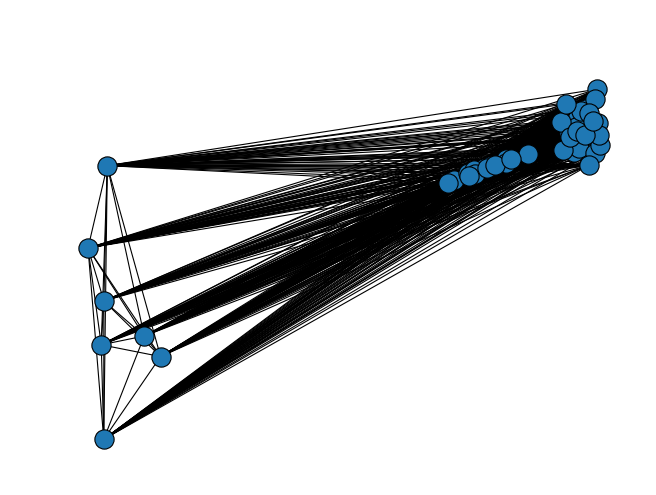

In [22]:
nx.draw(G)

## ---------------------------------------------------------------------------------------------------

# Community Detection (Asyncronous Fluid communities)

In [50]:
c = nx.algorithms.community.asyn_fluidc(G, k = 10, seed = 1337)

In [29]:
tuple(sorted(comm) for comm in next(c))

(['nifty', 'sgd'], ['inr', 'nikkei'], ['inr', 'sp500'])

In [51]:
import itertools

l = []
for communities in itertools.islice(c, 10):
    l.append(tuple(sorted(comm) for comm in communities))

In [60]:
l[4]

(['cny', 'uk_100'], ['inr', 'nikkei'], ['inr', 'uk_100'], ['nifty', 'usd'])

In [63]:
comm_cache = {}
for timestamp in list(G_cache):
    G = G_cache[timestamp]
    comm_iter = nx.algorithms.community.asyn_fluidc(G, k = 10, seed = 1337)
    comm = []
    for communities in itertools.islice(comm_iter, 10):
        comm.append(tuple(sorted(c) for c in communities))
    
    comm_cache[timestamp] = comm

In [65]:
comm_cache[list(comm_cache)[7]]

[(['sgd', 'uk_100'],
  ['hangseng', 'hkd'],
  ['hkd', 'sp500'],
  ['sgd', 'sp500'],
  ['uk_100', 'usd']),
 (['cny', 'sing_sti'],
  ['jpy', 'nifty'],
  ['inr', 'sp500'],
  ['cny', 'nifty'],
  ['sgd', 'sing_sti']),
 (['hkd', 'uk_100'],
  ['hangseng', 'sgd'],
  ['cny', 'shanghai_comp'],
  ['cny', 'nikkei'],
  ['jpy', 'sing_sti'],
  ['shanghai_comp', 'usd']),
 (['sp500', 'usd'],
  ['gbp', 'sing_sti'],
  ['cny', 'sp500'],
  ['jpy', 'nikkei'],
  ['hkd', 'shanghai_comp'],
  ['hkd', 'sing_sti']),
 (['cny', 'uk_100'], ['inr', 'nikkei'], ['inr', 'uk_100'], ['nifty', 'usd']),
 (['gbp', 'nikkei'], ['hangseng', 'jpy']),
 (['hkd', 'nikkei'],
  ['nikkei', 'sgd'],
  ['gbp', 'sp500'],
  ['jpy', 'sp500'],
  ['hkd', 'nifty'],
  ['gbp', 'hangseng'],
  ['sgd', 'shanghai_comp'],
  ['jpy', 'uk_100']),
 (['sing_sti', 'usd'], ['gbp', 'uk_100'], ['gbp', 'shanghai_comp']),
 (['hangseng', 'usd'],
  ['inr', 'shanghai_comp'],
  ['gbp', 'nifty'],
  ['cny', 'hangseng'],
  ['jpy', 'shanghai_comp']),
 (['inr', 'sing_st

## -----------------------------------------------------------------------------------------------------